In [1]:
import numpy as np
import scipy.io
import random
import sys
from collections import defaultdict
from matplotlib import pyplot as plt
data_path = './code/AllSamples.mat'
from copy import deepcopy
random.seed(40)

In [7]:
class KMeans():
    def __init__(self,num_clusters,data_path,strategy=1):
        random.seed(80)
        self.num_clusters = num_clusters
        self.center_points_dict = defaultdict(int)
        self.all_samples_data = self.load_data(data_path)
        self.all_centers = []
        if strategy==1:
            idxes = random.sample(set(range(len(self.all_samples_data))),self.num_clusters)
            self.all_centers = self.all_samples_data[idxes]
        elif strategy==2:
            rand_idx = random.randint(0,len(self.all_samples_data)-1)
            self.all_centers.append(self.all_samples_data[rand_idx])
            chosen_idx = [rand_idx]
#             print(rand_idx)
            
            for k in range(1,self.num_clusters):
                distances = self.choose_farthest_points_idx()
                for dist,idx in distances:
                    if idx not in chosen_idx:
#                         print(idx)
                        new_point = self.all_samples_data[idx]
                        chosen_idx.append(idx)
                        self.all_centers.append(new_point)
                        break
    
    
    def choose_farthest_points_idx(self):
        distances = []
        
        for i,points in enumerate(self.all_samples_data):
            curr_dist = []
            curr_dist = list(map(lambda x:self.euclidean_distance(points,x),self.all_centers))
            distances.append((np.average(np.array(curr_dist)),i))
        
#         print(np.argmax(distances))
        return sorted(distances,key=lambda x:x[0],reverse=True)
        
        
    def load_data(self,data_path):
        numpyfile= scipy.io.loadmat(data_path) 
        return numpyfile["AllSamples"]
    
    def objective_function(self):
        final_sum = 0
        for i in range(self.num_clusters):
            center_i = self.all_centers[i]
            data_points_i = self.center_points_dict[i]

            squared = np.square(center_i-data_points_i)
            sum_c = np.sum(squared)
            final_sum+=sum_c
        return final_sum
    
    def euclidean_distance(self,a,b):
        return np.linalg.norm(a-b)
    
    def plot_points(self):
        group = []
        x = []
        y = []
        for k,i in self.center_points_dict.items():
            group.extend([k+1]*len(i))
            x.extend([elem[0] for elem in i])
            y.extend([elem[1] for elem in i])
        group,x,y = np.array(group),np.array(x),np.array(y)
        fig, ax = plt.subplots(figsize=(10,10))
        cdict = {k+1:k+1 for k in range(k)}
        for g in np.unique(group):
            ix = np.where(group == g)
            ax.scatter(x[ix], y[ix], label = g, s = 100,cmap="viridis")
        ax.legend()
        plt.show()
    
    def plot_centroids(self):
        group = []
        x = []
        y = []
        for k in range(self.num_clusters):
            group.append(k)
            x.append(self.all_centers[k][0])
            y.append(self.all_centers[k][1])
        group,x,y = np.array(group),np.array(x),np.array(y)
        fig, ax = plt.subplots(figsize=(10,10))
        cdict = {k+1:k+1 for k in range(k)}
        min_x = min([x[0] for x in self.all_samples_data])
        max_x = max([x[0] for x in self.all_samples_data])
        min_y = min([x[1] for x in self.all_samples_data])
        max_y = max([x[1] for x in self.all_samples_data])
        plt.xlim([min_x-2, max_x+2])
        plt.ylim([min_y-2, max_y+2])
        for g in np.unique(group):
            ix = np.where(group == g)
            ax.scatter(x[ix], y[ix], label = g, s = 100,cmap="viridis")
        ax.legend()
        plt.show()
    
    
    def kmeans(self):
        while True:
            new_centers = deepcopy(self.all_centers)
            self.center_points_dict = defaultdict(list)

            for points in self.all_samples_data:
                min_dist = sys.maxsize
                min_idx = None
                for cluster_idx,cluster in enumerate(self.all_centers):
                    dist = self.euclidean_distance(points,cluster)
                    if min_idx==None:
                        min_dist = dist
                        min_idx = cluster_idx
                        continue

                    if dist<min_dist:
                        min_dist = dist
                        min_idx = cluster_idx

                self.center_points_dict[min_idx].append(points)

            for cluster_idx,points in self.center_points_dict.items():
                new_centers[cluster_idx] = np.mean(points,axis=0)
            
            if np.array_equal(new_centers,self.all_centers):
                break
            else:
                self.all_centers = deepcopy(new_centers)


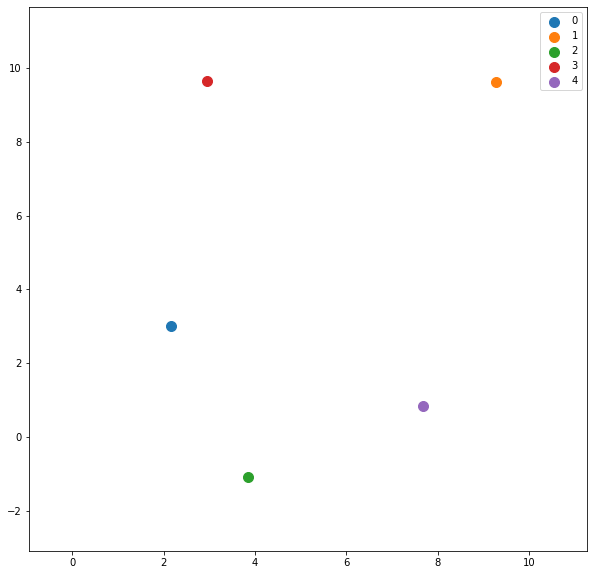

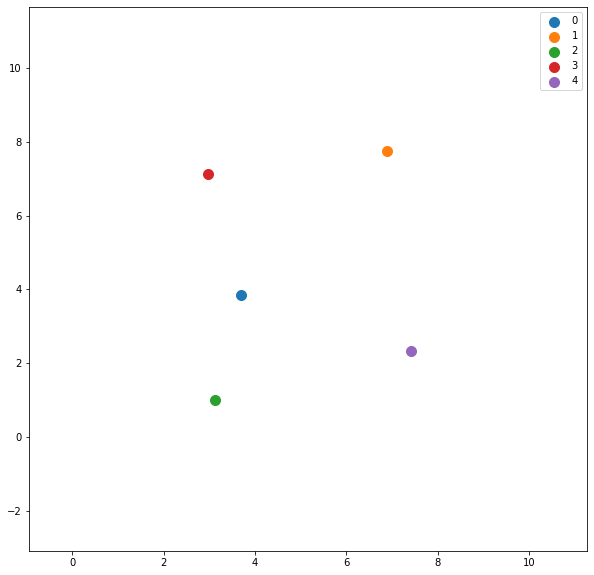

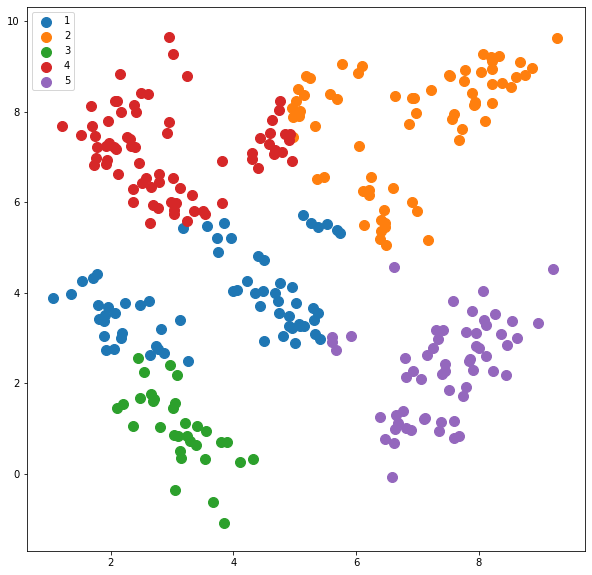

654.8779090667972

In [12]:
k = KMeans(5,data_path,strategy=2)

# k.all_centers
k.plot_centroids()
k.kmeans()
k.plot_centroids()
k.plot_points()
k.objective_function()

In [339]:
def compute_all_objective_costs(range_clusters,strategy):
    all_costs = []
    for i in range(2,range_clusters+1):
        k = KMeans(i,data_path,strategy=strategy)
        k.kmeans()
        cost = k.objective_function()
        print(cost)
        all_costs.append(cost)
    return all_costs

In [340]:
def plot_objective_function(strategy=1):
    costs = compute_all_objective_costs(range_clusters=10,strategy=strategy)
    k = list(range(2,11))
    
    # Visualize loss history
    plt.plot(k, costs)
    plt.xticks(list(range(1,max(k)+1)),[str(i) for i in range(1,max(k)+1)])
    plt.legend(['Elbow'])
    plt.xlabel('K')
    plt.ylabel('Cost')
    plt.show();

1921.0334858562062
1293.777452391135
792.723463026081
592.0694342732749
462.92635582483734
390.917576254225
290.8573092438313
232.27848278050436
219.7586884309621


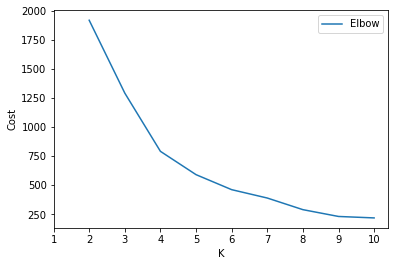

1921.0334858562062
1294.2984174853177
788.269349006556
654.8779090667972
476.11875167635293
367.6658464946495
290.9243344744376
277.39143397662207
260.0401982909563


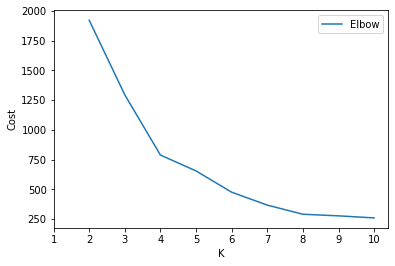

In [342]:
plot_objective_function(strategy=1)
plot_objective_function(strategy=2)